In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import re
import pandas as pd
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [73]:
import os
folder_path=r"C:\Users\boyu571\boyu571_Github\01_Kakaobank_SKKU_Research_23\data\naver_news_data\가상자산\가상자산_2023"

file_list=os.listdir(folder_path)

In [74]:
len(file_list)

16

In [75]:
import pandas as pd
a=pd.read_csv(folder_path+'/'+file_list[0])

In [76]:
for i, c in enumerate(file_list[1:]):
    if c.endswith('.csv'):
        print(i,c)
        a = pd.concat([a, pd.read_csv(os.path.join(folder_path, c))])


0 가상자산_20230118_20230207.csv
1 가상자산_20230208_20230226.csv
2 가상자산_20230227_20230316.csv
3 가상자산_20230317_20230403.csv
4 가상자산_20230404_20230420.csv
5 가상자산_20230421_20230508.csv
6 가상자산_20230509_20230513.csv
7 가상자산_20230514_20230517.csv
8 가상자산_20230518_20230524.csv
9 가상자산_20230525_20230603.csv
10 가상자산_20230604_20230618.csv
11 가상자산_20230619_20230704.csv
12 가상자산_20230705_20230723.csv
13 가상자산_20230724_20230808.csv
14 가상자산_20230809_20230830.csv


In [77]:
a

,date,time,title,content,press,link
0,2023.01.01,NaN,비트코인과 이더리움 안정적 흐름..새해에도 차분하게 시장 잘 살펴야..다복과...,NaN,매일안전신문,http://peoplesafe.kr
1,2023.01.01,NaN,"2023년 계묘년 '검은 토끼의 해'가 밝았습니다...""새해 복 많이 받으세요""",NaN,인사이트,http://www.insight.co.kr
2,2023.01.01,NaN,"2023년 비트코인, 어떨까?",NaN,이코노믹리뷰,http://www.econovill.com/
3,2023.01.01,NaN,[아듀2022 ②] 머지부터 FTX 파산까지...올해의 주요 이슈 TOP 10,NaN,토큰포스트,https://www.tokenpost.kr
4,2023.01.01,NaN,2023년 새해부터 달라지는 세금‧금융‧부동산 제도,NaN,조세금융신문,http://www.tfnews.co.kr/
...,...,...,...,...,...,...
3668,2023.08.30,NaN,상반기 금융사 '의심거래 보고' 증가…증권사 증가율 '톱',NaN,신아일보,http://www.shinailbo.co.kr/
3669,2023.08.30,2023-08-30 11:44:03,"[뉴스포커스] 윤대통령, 연일 '이념' 강조…'홍범도 흉상' 두고 논쟁 가열",\n\t\t\t&lt;출연 : 최수영 시사평론가·김성완 시사평론가&gt;윤석열 대통...,연합뉴스TV,https://n.news.naver.com/mnews/article/422/000...
3670,2023.08.30,NaN,커지는 자금세탁 우려…금융사 '의심 거래(STR)' 증가,NaN,금융소비자뉴스,http://newsfc.co.kr/
3671,2023.08.30,NaN,민관 함께 2조 규모 '스타트업 코리아 펀드' 조성…한국인 해외 창업도 지원한...,NaN,이투데이,http://www.etoday.co.kr


In [78]:
len(a)

60783

In [79]:
a['date'] = pd.to_datetime(a['date'])
sorted_df = a.sort_values(by='date', ascending=True)
sorted_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [80]:
sorted_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [81]:
sorted_df.to_csv(r'C:\Users\boyu571\boyu571_Github\01_Kakaobank_SKKU_Research_23\data\naver_news_data\가상자산\가상자산_2023.csv')

In [82]:
print(2023)
print('전체갯수',len(sorted_df))
print('기사내용 있는 것',len(sorted_df[sorted_df['content'].notna()]))

2023
전체갯수 60783
기사내용 있는 것 28325


In [71]:
sorted_df

,date,time,title,content,press,link
0,2022-01-01,NaN,"비트코인 4만8000달러 반등, 1시간 동안 1500달러 급등",NaN,글로벌이코노믹,http://www.g-enews.com/
1,2022-01-01,NaN,[인포그래픽 뉴스/업비트] 숫자로 보는 오늘의 비트·알트코인 (1월 1일),NaN,코인리더스,http://coinreaders.com
2,2022-01-01,2022-01-01 10:46:02,"비트코인, 새해 첫날에도 부진…5700만 원선 거래",\n\n\n\n\n1일 오전 10시 10분 기준 국내 가상자산 거래소 빗썸에서 비트...,더팩트,https://n.news.naver.com/mnews/article/629/000...
3,2022-01-01,NaN,[전망] 초개인화 사회! 2022년을 관통할 패션 비즈니스 트렌드 키워드 10,NaN,패션엔,http://www.fashionn.com
4,2022-01-01,2022-01-01 12:21:01,"4만% 올랐다…비트코인 주춤, 알트코인 뜬다",\n새해에도 비트코인 반등 없이 하락세작년에 게임·메타버스 알트코인 급등올해 코인 ...,이데일리언론사 선정,https://n.news.naver.com/mnews/article/018/000...
...,...,...,...,...,...,...
55305,2022-12-31,NaN,암호업계 '2022년 인물'…최악 얼룩진 '악동'들의 경연장,NaN,코인데스크코리아,https://www.coindeskkorea.com/
55306,2022-12-31,NaN,[아듀2022] 암호화폐 시장 흔든 '폭풍의 눈'...올해의 인물 누굴까,NaN,토큰포스트,https://www.tokenpost.kr
55307,2022-12-31,2022-12-31 10:21:03,"FTX 창업자 뱅크먼-프리드, 다음주 재판서 무죄 주장할 듯",\r\n기사내용 요약사기·돈세탁 8개 혐의로 기소…유죄시 115년형\r\n\r\n\...,뉴시스,https://n.news.naver.com/mnews/article/003/001...
55308,2022-12-31,NaN,도지코인도 PoS로 전환? 관련 루머 속 가격 하락,NaN,디지털투데이,http://www.digitaltoday.co.kr/


In [6]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\boyu571\boyu571_Github\01_Kakaobank_SKKU_Research_23\data\naver_news_data\비트코인\비트코인_2022.csv", index_col=0)
df

,date,time,title,content,press,link
0,2022-01-01,NaN,"테슬라, 중국서도 20만대 리콜로 하락...뉴욕증시, 오미크론 확산에 약세로 마...",NaN,글로벌경제,http://www.getnews.co.kr
1,2022-01-01,2022-01-01 10:46:02,"비트코인, 새해 첫날에도 부진…5700만 원선 거래",\n\n\n\n\n1일 오전 10시 10분 기준 국내 가상자산 거래소 빗썸에서 비트...,더팩트,https://n.news.naver.com/mnews/article/629/000...
2,2022-01-01,NaN,"[업비트 급등주]시빅·스토리지·스팀달러·베이직어텐션토큰·어거, 뭐길래?",NaN,핀포인트뉴스,http://www.pinpointnews.co.kr
3,2022-01-01,NaN,"두나무 코인 시장 공포탐욕 지수 44.43, '중립' 단계…비트코인은 '중립' 단계...",NaN,톱스타뉴스,http://www.TopStarNews.Net
4,2022-01-01,2022-01-01 12:21:01,"4만% 올랐다…비트코인 주춤, 알트코인 뜬다",\n새해에도 비트코인 반등 없이 하락세작년에 게임·메타버스 알트코인 급등올해 코인 ...,이데일리언론사 선정,https://n.news.naver.com/mnews/article/018/000...
...,...,...,...,...,...,...
56171,2022-12-31,NaN,암호업계 '2022년 인물'…최악 얼룩진 '악동'들의 경연장,NaN,코인데스크코리아,https://www.coindeskkorea.com/
56172,2022-12-31,2022-12-31 09:49:02,"""부동산도 주식도 폭락""…2022년 재테크 수익률 1위는?","\n1년 수익률은 달러, 금, 원자재 순올해 재테크 수단 가운데 달러가 가장 높은 ...",한국경제언론사 선정,https://n.news.naver.com/mnews/article/015/000...
56173,2022-12-31,NaN,올해 재테크 수익률 꼴찌는 비트코인...1위는?,NaN,청년일보,http://www.youthdaily.co.kr/
56174,2022-12-31,2022-12-31 09:36:01,올해 재테크 수익률 1위는 달러…상승·하락 상품은,\n\t\t\t올해 재테크 수단 중 가장 높은 수익률을 올린 것은 달러다. 31일 ...,국제신문언론사 선정,https://n.news.naver.com/mnews/article/658/000...


In [3]:
df = df.rename(columns={'dates': 'date'})

# Reorder the columns
df = df[['date', 'time', 'title', 'content', 'press', 'link']]
df

,date,time,title,content,press,link
0,2022-01-01,NaN,"테슬라, 중국서도 20만대 리콜로 하락...뉴욕증시, 오미크론 확산에 약세로 마...",NaN,글로벌경제,http://www.getnews.co.kr
1,2022-01-01,2022-01-01 10:46:02,"비트코인, 새해 첫날에도 부진…5700만 원선 거래",\n\n\n\n\n1일 오전 10시 10분 기준 국내 가상자산 거래소 빗썸에서 비트...,더팩트,https://n.news.naver.com/mnews/article/629/000...
2,2022-01-01,NaN,"[업비트 급등주]시빅·스토리지·스팀달러·베이직어텐션토큰·어거, 뭐길래?",NaN,핀포인트뉴스,http://www.pinpointnews.co.kr
3,2022-01-01,NaN,"두나무 코인 시장 공포탐욕 지수 44.43, '중립' 단계…비트코인은 '중립' 단계...",NaN,톱스타뉴스,http://www.TopStarNews.Net
4,2022-01-01,2022-01-01 12:21:01,"4만% 올랐다…비트코인 주춤, 알트코인 뜬다",\n새해에도 비트코인 반등 없이 하락세작년에 게임·메타버스 알트코인 급등올해 코인 ...,이데일리언론사 선정,https://n.news.naver.com/mnews/article/018/000...
...,...,...,...,...,...,...
56171,2022-12-31,NaN,암호업계 '2022년 인물'…최악 얼룩진 '악동'들의 경연장,NaN,코인데스크코리아,https://www.coindeskkorea.com/
56172,2022-12-31,2022-12-31 09:49:02,"""부동산도 주식도 폭락""…2022년 재테크 수익률 1위는?","\n1년 수익률은 달러, 금, 원자재 순올해 재테크 수단 가운데 달러가 가장 높은 ...",한국경제언론사 선정,https://n.news.naver.com/mnews/article/015/000...
56173,2022-12-31,NaN,올해 재테크 수익률 꼴찌는 비트코인...1위는?,NaN,청년일보,http://www.youthdaily.co.kr/
56174,2022-12-31,2022-12-31 09:36:01,올해 재테크 수익률 1위는 달러…상승·하락 상품은,\n\t\t\t올해 재테크 수단 중 가장 높은 수익률을 올린 것은 달러다. 31일 ...,국제신문언론사 선정,https://n.news.naver.com/mnews/article/658/000...


In [4]:
df.to_csv(r'C:\Users\boyu571\boyu571_Github\01_Kakaobank_SKKU_Research_23\data\naver_news_data\비트코인\비트코인_2022.csv')

In [7]:
print('전체갯수',len(df))
print('기사내용 있는 것',len(df[df['content'].notna()]))

전체갯수 56176
기사내용 있는 것 20639


In [ ]:
desired_columns_order = ['date', 'time', 'title', 'content', 'press', 'link']
df = df[desired_columns_order]

In [15]:
folder_path=r"C:\Users\boyu571\boyu571_Github\01_Kakaobank_SKKU_Research_23\data\naver_news_data\암호화폐"

file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

In [16]:
file_list

['암호화폐_2017.csv',
 '암호화폐_2018.csv',
 '암호화폐_2019.csv',
 '암호화폐_2020.csv',
 '암호화폐_2021.csv',
 '암호화폐_2022.csv',
 '암호화폐_2023.csv']

In [17]:
a=pd.read_csv(folder_path+'/'+file_list[0])
for i, c in enumerate(file_list[1:]):
    if c.endswith('.csv'):
        print(i,c)
        a = pd.concat([a, pd.read_csv(os.path.join(folder_path, c))])

0 암호화폐_2018.csv
1 암호화폐_2019.csv
2 암호화폐_2020.csv
3 암호화폐_2021.csv
4 암호화폐_2022.csv
5 암호화폐_2023.csv


In [14]:
va = a.iloc[:, 1:7]


In [18]:
cc = a.iloc[:, 1:7]

In [10]:
bc = a.iloc[:, 1:7]

In [1]:
df

NameError: name 'df' is not defined

In [19]:
df = pd.concat([va, cc, bc], ignore_index=True)
df

,date,time,title,content,press,link
0,2017-01-01,2017-01-01 07:00:00,한국 금융산업 위기… ‘우버 모멘트’ 를 넘어라,\n\n\n\n\n© News1저금리·저성장 전통 금융산업 위기4차 산업혁명...세...,뉴스1,https://n.news.naver.com/mnews/article/421/000...
1,2017-01-01,2017-01-01 07:02:03,"2017년 주식 투자…IT, 인프라 ‘솔깃’ 해외주식도 담아보자",\n\t\t\t[헤럴드경제=김지헌 기자] 올해도 지루한 박스피(박스권에 갇힌 코스피...,헤럴드경제,https://n.news.naver.com/mnews/article/016/000...
2,2017-01-01,NaN,"[신년사] 이동걸 산업은행 회장 ""정책금융 본연 역할 충실 수행""",NaN,한국금융신문,http://www.fntimes.com
3,2017-01-01,NaN,미국·독일에서 엿보는 ‘스마트 팩토리’ 전략,NaN,이코노믹리뷰,http://www.econovill.com/
4,2017-01-01,NaN,[달라지는 금융제도] 잔금대출때 소득증명 의무화…저축성보험 납입기간 후 원...,NaN,금강일보,http://www.ggilbo.com
...,...,...,...,...,...,...
1320213,2023-08-23,NaN,"[토큰포스트 오후 브리핑] 비트코인 초기 개발자, 비트코인 네트워크에 '드라...",NaN,토큰포스트,https://www.tokenpost.kr
1320214,2023-08-23,NaN,"마크 큐반 ”오픈씨, 로열티 시스템 폐지는 큰 실수”",NaN,코인리더스,http://coinreaders.com
1320215,2023-08-23,2023.08.23. 오전 10:45,"'소옆경2' 김래원이 체포해야 할 최종 빌런, '덱스'는 누구인가",\n \n[SBS연예뉴스 | 강선애 기자] '소방서 옆 경찰서 그리고 국과수'의 최...,SBS연예뉴스,https://n.news.naver.com/mnews/article/416/000...
1320216,2023-08-23,NaN,"[토큰포스트 뉴욕 브리핑] 비트코인 초기 개발자, BTC 사이드체인 도입 제안 ...",NaN,토큰포스트,https://www.tokenpost.kr


In [20]:
sorted_df = df.sort_values(by='date', ascending=True)
sorted_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
sorted_df

,date,time,title,content,press,link
0,2017-01-01,2017-01-01 07:00:00,한국 금융산업 위기… ‘우버 모멘트’ 를 넘어라,\n\n\n\n\n© News1저금리·저성장 전통 금융산업 위기4차 산업혁명...세...,뉴스1,https://n.news.naver.com/mnews/article/421/000...
1,2017-01-01,2017-01-01 15:15:04,"英 파운드, 2016년 최악의 통화 ···'디지털통화' 비트코인 최고의 수익자산...",\n【뉴욕=정지원 특파원】 영국의 파운드가 2106년 최악의 통화로 기록됐다.\n ...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...
2,2017-01-01,2017-01-01 16:03:04,"[신년기획]블록체인, 금융권 넘어 IT기업도 관심",\n\t\t\t“블록체인은 인터넷 이후 나온 가장 혁신적이며 파괴적인 기술이다.”블...,39면 1단,https://n.news.naver.com/mnews/article/030/000...
3,2017-01-01,NaN,[2017 신년특집] 세계 금융의 대변화-화폐없는 시대가 온다 디지털 가상화폐 ...,NaN,울산매일신문,http://www.iusm.co.kr
4,2017-01-01,NaN,"[아시아 밀레니얼이 미래다] 게으른 나르시스트, 신 경제 창조하는 이 시대의...",NaN,아시아투데이,http://www.asiatoday.co.kr
...,...,...,...,...,...,...
906570,2023-08-30,2023-08-30 06:30:00,갈수록 줄어드는 스테이블코인 유통량…가상자산 가격도 횡보,\n스테이블코인 유통량 증가하면 가상자산 가격도 올라이변 없었던 잭슨홀 미팅 호재에...,6면 1단,https://n.news.naver.com/mnews/article/277/000...
906571,2023-08-30,2023-08-30 06:54:01,"[이충재의 인사이트] 김남국 징계 계기, 국회의원 '정직 6개월' 두자",\n'30일내 출석정지'와 '제명' 간 차이 커 실효성 논란...윤리특위 징계 유명...,오마이뉴스언론사 선정,https://n.news.naver.com/mnews/article/047/000...
906572,2023-08-30,2023-08-30 06:11:00,오늘 김남국 제명안 표결···'숙고의 시간' 거친 민주당 선택은,\n[the300]\n\n\n\n(서울=뉴스1) 임세영 기자 = 김남국 무소속 의원...,머니투데이,https://n.news.naver.com/mnews/article/008/000...
906573,2023-08-30,2023-08-30 06:20:57,국회 윤리특위 오늘 김남국 징계 수위 결정,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n[뉴스투데이]국회 윤리특별위원...,MBC언론사 선정,https://n.news.naver.com/mnews/article/214/000...


In [21]:
print('전체갯수',len(sorted_df))
print('기사내용 있는 것',len(sorted_df[sorted_df['content'].notna()]))

전체갯수 906575
기사내용 있는 것 317335


In [1]:
sorted_df.to_csv(r'C:\Users\user\boyu571_github\01_Kakaobank_SKKU_Research_23\naver_news_data.csv')

NameError: name 'sorted_df' is not defined

In [23]:
df = pd.read_csv('', index_col=0)

# 통합데이터 전처리

In [2]:
df = pd.read_csv(r'C:\Users\user\boyu571_github\01_Kakaobank_SKKU_Research_23\naver_news_data.csv', index_col=0)
df

,date,time,title,content,press,link
0,2017-01-01,2017-01-01 07:00:00,한국 금융산업 위기… ‘우버 모멘트’ 를 넘어라,\n\n\n\n\n© News1저금리·저성장 전통 금융산업 위기4차 산업혁명...세...,뉴스1,https://n.news.naver.com/mnews/article/421/000...
1,2017-01-01,2017-01-01 15:15:04,"英 파운드, 2016년 최악의 통화 ···'디지털통화' 비트코인 최고의 수익자산...",\n【뉴욕=정지원 특파원】 영국의 파운드가 2106년 최악의 통화로 기록됐다.\n ...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...
2,2017-01-01,2017-01-01 16:03:04,"[신년기획]블록체인, 금융권 넘어 IT기업도 관심",\n\t\t\t“블록체인은 인터넷 이후 나온 가장 혁신적이며 파괴적인 기술이다.”블...,39면 1단,https://n.news.naver.com/mnews/article/030/000...
3,2017-01-01,NaN,[2017 신년특집] 세계 금융의 대변화-화폐없는 시대가 온다 디지털 가상화폐 ...,NaN,울산매일신문,http://www.iusm.co.kr
4,2017-01-01,NaN,"[아시아 밀레니얼이 미래다] 게으른 나르시스트, 신 경제 창조하는 이 시대의...",NaN,아시아투데이,http://www.asiatoday.co.kr
...,...,...,...,...,...,...
906570,2023-08-30,2023-08-30 06:30:00,갈수록 줄어드는 스테이블코인 유통량…가상자산 가격도 횡보,\n스테이블코인 유통량 증가하면 가상자산 가격도 올라이변 없었던 잭슨홀 미팅 호재에...,6면 1단,https://n.news.naver.com/mnews/article/277/000...
906571,2023-08-30,2023-08-30 06:54:01,"[이충재의 인사이트] 김남국 징계 계기, 국회의원 '정직 6개월' 두자",\n'30일내 출석정지'와 '제명' 간 차이 커 실효성 논란...윤리특위 징계 유명...,오마이뉴스언론사 선정,https://n.news.naver.com/mnews/article/047/000...
906572,2023-08-30,2023-08-30 06:11:00,오늘 김남국 제명안 표결···'숙고의 시간' 거친 민주당 선택은,\n[the300]\n\n\n\n(서울=뉴스1) 임세영 기자 = 김남국 무소속 의원...,머니투데이,https://n.news.naver.com/mnews/article/008/000...
906573,2023-08-30,2023-08-30 06:20:57,국회 윤리특위 오늘 김남국 징계 수위 결정,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n[뉴스투데이]국회 윤리특별위원...,MBC언론사 선정,https://n.news.naver.com/mnews/article/214/000...


In [3]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# 'year' 열로 그룹화하고 카운트
yearly_counts = df.groupby('year').size()

yearly_counts

year
2017     34478
2018    192624
2019    229493
2020     65457
2021    146787
2022    151250
2023     86486
dtype: int64

In [4]:
# 'content' 열이 비어있지 않은 행만 필터링
non_empty_content = df[df['content'].notnull()]

# 필터링된 결과를 년도별로 그룹화하고 카운트
yearly_counts_non_empty = non_empty_content.groupby('year').size()

yearly_counts_non_empty

year
2017    15535
2018    72445
2019    38508
2020    23876
2021    66870
2022    61821
2023    38280
dtype: int64

### content(본문) 있는 행만 남기기

In [5]:
# 'content' 열이 비어있지 않은 행만 필터링
non_empty_content_datewise = df[df['content'].notnull()]
non_empty_content_datewise

,date,time,title,content,press,link,year
0,2017-01-01,2017-01-01 07:00:00,한국 금융산업 위기… ‘우버 모멘트’ 를 넘어라,\n\n\n\n\n© News1저금리·저성장 전통 금융산업 위기4차 산업혁명...세...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2017
1,2017-01-01,2017-01-01 15:15:04,"英 파운드, 2016년 최악의 통화 ···'디지털통화' 비트코인 최고의 수익자산...",\n【뉴욕=정지원 특파원】 영국의 파운드가 2106년 최악의 통화로 기록됐다.\n ...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,2017
2,2017-01-01,2017-01-01 16:03:04,"[신년기획]블록체인, 금융권 넘어 IT기업도 관심",\n\t\t\t“블록체인은 인터넷 이후 나온 가장 혁신적이며 파괴적인 기술이다.”블...,39면 1단,https://n.news.naver.com/mnews/article/030/000...,2017
5,2017-01-01,2017-01-01 12:03:13,[2017 국제 핫이슈]블록체인 기술 확산,\n\t\t\t블록체인은 `제2의 인터넷` `넥스트 인터넷`으로 불린다. 새해에는 ...,전자신문,https://n.news.naver.com/mnews/article/030/000...,2017
6,2017-01-01,2017-01-01 10:33:04,5대 키워드로 보는 2016년 핀테크 트렌드,\n\t\t\t2016년 한 해 동안 다양한 핀테크 얘기가 쏟아졌다. IT 기업부터...,블로터,https://n.news.naver.com/mnews/article/293/000...,2017
...,...,...,...,...,...,...,...
906568,2023-08-30,2023-08-30 06:43:01,"美법원, SEC에 비트코인 현물ETF 반려 결정 재고하라고 지시…비트코인 가격 ...",\n\n\n\n\n[로이터][헤럴드경제=김우영 기자] 미 연방법원이 비트코인 현물 ...,헤럴드경제,https://n.news.naver.com/mnews/article/016/000...,2023
906570,2023-08-30,2023-08-30 06:30:00,갈수록 줄어드는 스테이블코인 유통량…가상자산 가격도 횡보,\n스테이블코인 유통량 증가하면 가상자산 가격도 올라이변 없었던 잭슨홀 미팅 호재에...,6면 1단,https://n.news.naver.com/mnews/article/277/000...,2023
906571,2023-08-30,2023-08-30 06:54:01,"[이충재의 인사이트] 김남국 징계 계기, 국회의원 '정직 6개월' 두자",\n'30일내 출석정지'와 '제명' 간 차이 커 실효성 논란...윤리특위 징계 유명...,오마이뉴스언론사 선정,https://n.news.naver.com/mnews/article/047/000...,2023
906572,2023-08-30,2023-08-30 06:11:00,오늘 김남국 제명안 표결···'숙고의 시간' 거친 민주당 선택은,\n[the300]\n\n\n\n(서울=뉴스1) 임세영 기자 = 김남국 무소속 의원...,머니투데이,https://n.news.naver.com/mnews/article/008/000...,2023


### 관련 없는 행 제거

In [6]:
filtered_df = non_empty_content_datewise[
    ~non_empty_content_datewise['content'].str.contains('라이온봇|화폐에 대한 모든 것!', na=False)
]
removed_df = non_empty_content_datewise[
    non_empty_content_datewise['content'].str.contains('라이온봇|화폐에 대한 모든 것!', na=False)
]

print(len(non_empty_content_datewise))
print(len(filtered_df))
print(len(removed_df))

filtered_df

317335
259994
57341


,date,time,title,content,press,link,year
0,2017-01-01,2017-01-01 07:00:00,한국 금융산업 위기… ‘우버 모멘트’ 를 넘어라,\n\n\n\n\n© News1저금리·저성장 전통 금융산업 위기4차 산업혁명...세...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2017
1,2017-01-01,2017-01-01 15:15:04,"英 파운드, 2016년 최악의 통화 ···'디지털통화' 비트코인 최고의 수익자산...",\n【뉴욕=정지원 특파원】 영국의 파운드가 2106년 최악의 통화로 기록됐다.\n ...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,2017
2,2017-01-01,2017-01-01 16:03:04,"[신년기획]블록체인, 금융권 넘어 IT기업도 관심",\n\t\t\t“블록체인은 인터넷 이후 나온 가장 혁신적이며 파괴적인 기술이다.”블...,39면 1단,https://n.news.naver.com/mnews/article/030/000...,2017
5,2017-01-01,2017-01-01 12:03:13,[2017 국제 핫이슈]블록체인 기술 확산,\n\t\t\t블록체인은 `제2의 인터넷` `넥스트 인터넷`으로 불린다. 새해에는 ...,전자신문,https://n.news.naver.com/mnews/article/030/000...,2017
6,2017-01-01,2017-01-01 10:33:04,5대 키워드로 보는 2016년 핀테크 트렌드,\n\t\t\t2016년 한 해 동안 다양한 핀테크 얘기가 쏟아졌다. IT 기업부터...,블로터,https://n.news.naver.com/mnews/article/293/000...,2017
...,...,...,...,...,...,...,...
906568,2023-08-30,2023-08-30 06:43:01,"美법원, SEC에 비트코인 현물ETF 반려 결정 재고하라고 지시…비트코인 가격 ...",\n\n\n\n\n[로이터][헤럴드경제=김우영 기자] 미 연방법원이 비트코인 현물 ...,헤럴드경제,https://n.news.naver.com/mnews/article/016/000...,2023
906570,2023-08-30,2023-08-30 06:30:00,갈수록 줄어드는 스테이블코인 유통량…가상자산 가격도 횡보,\n스테이블코인 유통량 증가하면 가상자산 가격도 올라이변 없었던 잭슨홀 미팅 호재에...,6면 1단,https://n.news.naver.com/mnews/article/277/000...,2023
906571,2023-08-30,2023-08-30 06:54:01,"[이충재의 인사이트] 김남국 징계 계기, 국회의원 '정직 6개월' 두자",\n'30일내 출석정지'와 '제명' 간 차이 커 실효성 논란...윤리특위 징계 유명...,오마이뉴스언론사 선정,https://n.news.naver.com/mnews/article/047/000...,2023
906572,2023-08-30,2023-08-30 06:11:00,오늘 김남국 제명안 표결···'숙고의 시간' 거친 민주당 선택은,\n[the300]\n\n\n\n(서울=뉴스1) 임세영 기자 = 김남국 무소속 의원...,머니투데이,https://n.news.naver.com/mnews/article/008/000...,2023


In [7]:
# 필터링된 결과를 날짜별로 그룹화하고 카운트
datewise_counts_non_empty = filtered_df.groupby('date').size()

datewise_counts_non_empty

date
2017-01-01      6
2017-01-02     23
2017-01-03     32
2017-01-04     12
2017-01-05     18
             ... 
2023-08-26     15
2023-08-27     20
2023-08-28    123
2023-08-29     79
2023-08-30     76
Length: 2430, dtype: int64

### 일별 분포

count    2430.000000
mean      106.993416
std       106.989824
min         1.000000
25%        34.000000
50%        72.000000
75%       151.000000
max       725.000000
dtype: float64


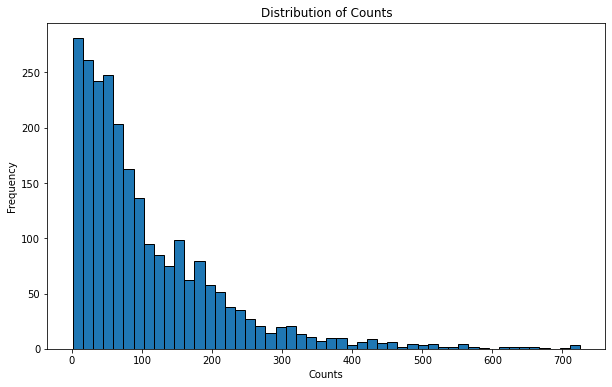

In [8]:
import matplotlib.pyplot as plt

# 기본 통계 요약
print(datewise_counts_non_empty.describe())

# 히스토그램
plt.figure(figsize=(10, 6))
datewise_counts_non_empty.hist(bins=50, edgecolor='black')
plt.title("Distribution of Counts")
plt.xlabel("Counts")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()


### 일별 min 값 분포

In [9]:
# 상위 50개의 행을 가져옵니다.
top_n_min_values = datewise_counts_non_empty.nsmallest(100)

# 인덱스(date)가 주말인지 확인합니다.
is_weekend = top_n_min_values.index.weekday >= 5

# 결과를 출력합니다.
print(is_weekend)

# numpy 배열을 pandas Series로 변환
is_weekend_series = pd.Series(is_weekend)

# True와 False의 개수를 센다.
counts = is_weekend_series.value_counts()

print(counts)

[ True False  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True False False  True False  True  True False  True
  True  True  True  True  True  True  True  True  True  True False False
 False False  True  True False False  True  True False False  True  True
  True  True  True  True]
True     82
False    18
dtype: int64


### 일별 max 값 분포

In [10]:
# 상위 50개의 행을 가져옵니다.
top_n_min_values = datewise_counts_non_empty.nlargest(100)

# 인덱스(date)가 주말인지 확인합니다.
is_weekend = top_n_min_values.index.weekday >= 5

# 결과를 출력합니다.
print(is_weekend)

# numpy 배열을 pandas Series로 변환
is_weekend_series = pd.Series(is_weekend)

# True와 False의 개수를 센다.
counts = is_weekend_series.value_counts()

print(counts)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
False    99
True      1
dtype: int64


In [11]:
# 가장 많은 카운트를 가진 날짜 추출
max_count_date = datewise_counts_non_empty.idxmax()
max_count_value = datewise_counts_non_empty[max_count_date]

max_count_date, max_count_value


# 가장 많은 카운트를 가진 날짜에 해당하는 행을 추출
max_count_rows = filtered_df.loc[filtered_df['date'] == max_count_date]


max_count_rows
# max_count_rows.to_csv('20180610_test.csv', encoding="UTF-8-sig", index=False)


,date,time,title,content,press,link,year
675454,2022-01-19,2022-01-19 09:23:01,"[코인뉴스] 비트코인, 바닥 친 거래량 6조원도 위태…‘춥다 추워’",\n얼어붙은 시장 분위기에 추가 시세하락 우려\n\n\n\n비트코인 관련 이미지.ⓒ...,데일리안언론사 선정,https://n.news.naver.com/mnews/article/119/000...,2022
675457,2022-01-19,2022-01-19 09:04:00,[코인시황]비트코인 5100만원대…미 연준 긴축정책 공포,\n\n\n\n\n[서울=뉴시스]이주혜 기자 = 비트코인이 5100만원대에 머물고 ...,뉴시스,https://n.news.naver.com/mnews/article/003/001...,2022
675459,2022-01-19,2022-01-19 09:15:25,"美 증시, 5중고에 `검은 화요일` 마진콜+단기금리 급등+B/S 축소+금융규제+실...",\n\t\t\t본격적인 어닝 시즌을 맞아 미 증시가 상승할 것이라 기대했던 서학 개...,한국경제TV,https://n.news.naver.com/mnews/article/215/000...,2022
675460,2022-01-19,2022-01-19 12:56:35,"李 ""가상자산 법제화"" vs 尹 ""5천만원 비과세""…불붙은 코인 전쟁","\n이재명·윤석열, 19일 나란히 암호화폐 공약 발표하며 표심잡기두 후보 모두 가상...",뉴스1언론사 선정,https://n.news.naver.com/mnews/article/421/000...,2022
675462,2022-01-19,2022-01-19 13:04:01,우리 집 공유기가 악성코드 유포? 국정원 “IoT 기기 위협에 노출”,"\n\n\n\n\n[디지털데일리 이종현기자] 글로벌 인터넷 공유기, 폐쇄회로(CC)...",디지털데일리,https://n.news.naver.com/mnews/article/138/000...,2022
...,...,...,...,...,...,...,...
676811,2022-01-19,2022-01-19 10:02:04,"AR·VR 앞세운 메타버스 폭풍, 블록체인 금융·경영 혁신을 주목하라!",\n2022년 디지털 트렌드 핵심 ‘탈중앙화’\n\n\n\n네이버가 출시한 메타버스...,주간동아언론사 선정,https://n.news.naver.com/mnews/article/037/000...,2022
676815,2022-01-19,2022-01-19 17:24:01,"이재명 ""카카오페이 먹튀 철저 조사""","\n""2030 표심 잡자""이재명 vs 윤석열, 주식·코인 공약매각차익에 골몰한 도덕...",A6면 1단,https://n.news.naver.com/mnews/article/015/000...,2022
676816,2022-01-19,2022-01-19 17:25:01,"윤석열 ""코인 과세는 기반 구축 뒤에""","\n""2030 표심 잡자""이재명 vs 윤석열, 주식·코인 공약디지털자산 法제정·진흥...",A6면 1단,https://n.news.naver.com/mnews/article/015/000...,2022
676820,2022-01-19,2022-01-19 08:24:03,"이재명, 4대 가상자산 거래소 대표 간담회… 경로당 회장단 지지선언도",\n\n\n\n\n이재명 더불어민주당 대선후보가 19일 4대 가상자산 거래소 대표와...,머니S언론사 선정,https://n.news.naver.com/mnews/article/417/000...,2022


In [59]:
max_count_rows['content'].iloc[600]

'\r\n텐센트·소니 이어 업계 3위 등극82조 인수… 업계 지각변동 예고메타버스 주도권 등 쟁탈전 가열\r\n\r\n\r\n\r\n마이크로소프트가 세계적인 게임 기업 \'액티비전 블리자드\'를 687억 달러(약 82조원)에 인수한다. 마이크로소프트 제공    MS(마이크로소프트)가 세계적인 게임 기업 \'액티비전 블리자드\'를 687억 달러(약 82조원)에 인수한다. 글로벌 IT(정보통신) 산업 역사상 최대 규모의 M&amp;A(인수합병)로, 게임 업계의 지각 변동이 예상된다.MS는 18일(미국 현지시간) 액티비전 블리자드를 687억달러에 전액 현금 인수한다고 발표했다. 인수가는 지난 14일 주가에서 45% 프리미엄을 붙인 주당 95달러로 책정했다. 블리자드 주가는 지난 14일 65.39달러에 마감했다.MS는 이날 인수 계획과 함께 게임 사업을 확장하고 메타버스 주도권 쟁탈전에 본격 참여하겠다는 구상을 밝혔다. MS 관계자는 "게임은 가장 크고 빠르게 성장하는 엔터테인먼트로, 블리자드는 게임 개발과 양방향 엔터테인먼트 콘텐츠 선두주자"라며 "이번 인수를 통해 모바일, PC, 콘솔, 클라우드 전반에 걸친 게임 사업을 가속화하고 메타버스의 토대를 쌓겠다"고 설명했다.MS는 이번 인수가 완료되면 매출 기준으로 텐센트, 소니에 이어 세계 3위 게임사로 등극한다. 블리자드는 스타크래프트를 포함해 \'디아블로\', \'콜 오브 듀티\', \'오버워치\', \'캔디 크러시 사가\' 등 세계적인 게임 IP(지식재산권)를 보유하고 있다. 블리자드의 게임들이 MS의 엑스박스에 합류할 경우 소니의 플레이스테이션을 뛰어넘는 강력한 시너지 효과가 기대된다. MS는 엑스박스 게임 패스에 블리자드의 게임을 출시해 포트폴리오를 확장하겠다고 밝혔다. 엑스박스 게임 패스는 월정액 구독 방식의 게임 서비스로 가입자가 2500만명에 이른다. MS는 이번 인수로 글로벌 e스포츠 자산과 1만명에 달하는 게임 개발인력도 확보한다. 필 스펜서 MS 게이밍 CEO(최고경영자)는 "전 세계 게임 플레이어

In [51]:
# 가장 많은 카운트를 가진 날짜 추출
max_count_date = datewise_counts_non_empty.idxmax()
max_count_value = datewise_counts_non_empty[max_count_date]

max_count_date, max_count_value


(Timestamp('2022-01-19 00:00:00'), 51)

In [ ]:
max_20180321 = filtered_df_final.loc[filtered_df_final['UTC-date'] == max_count_date]
max_20180321